[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MartinStrobelSP/EssentialOptimizationForPractice/blob/main/Activity1_Production_Planning_for_Two_Products.ipynb)

# Application Problem 1 - Production Planning for Two Products

### Overview


A small manufacturing company produces two types of products: Product A and Product B. The company has limited resources available, including 40 hours of labor and 20 pounds of raw material per week.

- **Product A:** requires 2 hours of labor and 1 pound of raw material per unit.
- **Product B:** requires 4 hours of labor and 2 pounds of raw material per unit.

The company makes a profit of dollar \\$10 per unit of Product A and \\$15 per unit of Product B.

The company wants to determine the optimal production plan (number of units of Product A and Product B to produce) that maximizes weekly profit.
<div align="center">
   <img src="images/activity1_factory.png" width="300">
</div>
    

#### Decision Variables:

- $x_A$: Number of units of Product A to produce ($ 0 \leq x_A \leq 15$)
- $x_B$: Number of units of Product B to produce ($ 0 \leq x_B \leq 15$)

#### Parameters

- $p_A$: Profit per unit of Product A (\\$10)
- $p_B$: Profit per unit of Product B (\\$15)
- $L$: Total available labour hours (40 hours)
- $R$: Total available raw material (20 pounds)
- $l_A$: Labour hours required per unit of Product A (2 hours)
- $l_B$: Labour hours required per unit of Product B (4 hours)
- $r_A$: Raw material required per unit of Prdouct A (2 pounds)
- $r_B:$ Raw material required per unit of Product B (1 pound)  




### 1-1 Activity: Formulate the Problem

**ToDo:** 

Do the following tasks:
- **Define** the decision variables and any constraint on them
- **Formulate** the objective function
- **Define** the constraints and formulate them

You can drag an image of your formulation in the cell below and execute the cell to save your formulation within this notebook.

#### Solution

**Objective Function**

Maximize profit:
\begin{align}
&\max_{x_A,x_B} p_Ax_A + p_Bx_B \\
&\max_{x_A,x_B} 10x_A + 15x_B 
\end{align}

---

**Constraints**

**1. Labour constraints**

We can only use the available labour:
\begin{align}
l_Ax_A + l_Bx_B &\leq L \\
2x_A + 4x_B &\leq 40
\end{align}

**2. Raw material constraints**

We can only use the available material:
\begin{align}
r_Ax_A + r_Bx_B &\leq R \\
2x_A + 1x_B &\leq 20
\end{align}

**3. Construction constraints**

We can only produce a certain number of units:
\begin{align}
0 \leq x_A \leq 15  \\
0 \leq x_B \leq 15 \\
x_A,x_B \in \mathbb{Z_+}
\end{align}

### 1-2 Anaylzing the Problem

- This problem has a guaranteed set of feasible solutions within the constraints.
- The decision variables,  $ x_A $ and $ x_B $, must be non-negative integers. 
- However, for a simplified initial analysis, we can treat them as continuous variables.
- This problem provides a practical example of how linear programming can be applied in a manufacturing setting to optimize production decisions and maximize profiits.


#### Graphical Representation and Algorithm

This problem can be easily visualized and solved graphically.

**Plot the constraints**

- Each constraint (labor, raw material, non-negativity) will be represented by a line on a graph with $x_A$ and $x_B$ as the axes. 
- These lines define the feasible region where all constraints are satisfied.

**Plot the objective function**

- The objective function (profit) can be represented by a line that moves parallel to itself as the profit value changes.

**Find the optimal solution**
- The optimal solution will lie at one of the corner points (vertices) of the feasible region.
- The algorithm (e.g., the Simplex Method) systematically evaluates these corner points to find the one that maximizes the objective function (profi).
- Imagine the number of vertices to evaluate when a problem has 20 decision variables and 40 constraints, for example.os

<div align="center">
   <img src="images/activity1_visualization.png" width="900">
</div> 

### 1-3 Code Reference

In [107]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [86]:
# Formulating the problem with the model, decision variables, objective function 
# and constraints. Includes the call to optimize the objective function.
# All data entered in the code. 


model = gp.Model("myBIP") # Creating and naming the module

# Defining the decision variables and their lower and upper boundaries
x_A = model.addVar(lb=0.0, ub=15.0, vtype=GRB.INTEGER, name="x")
x_B = model.addVar(lb=0.0, ub=15.0, vtype=GRB.INTEGER, name="y")

#Defining the objective function
Profit = 10*x_A + 15*x_B
model.setObjective(Profit, GRB.MAXIMIZE)

#Defining the constraints and their limits
Constraint_1 = 2*x_A + 4*x_B
Constraint_2 = 2*x_A + x_B
Bound_1 = 40
Bound_2 = 20

#Adding the constraints to the model
# Labor Constraint
Constr_1 = model.addConstr((Constraint_1<= Bound_1), name="Constraint1")

# Raw Material Constraint
Constr_2 = model.addConstr((Constraint_2<= Bound_2), name="Constraint2")

# Non-Negativity Constraints
# Th inclusion of lower bounds is redundant given that we already set lower bounds in the variable definition 
model.addConstr((x_A >= 0), name="Constraint3")
model.addConstr((x_B >= 0), name="Constraint4")

#Calling for the optimization of the model
model.optimize()

# Printing out the Optimal solutiom

# If the optimization process produces an optimal solution: 
# Print the objective function value and the decision variable values at this optimal solution.
if model.status == GRB.OPTIMAL:
      # Get the optimal value of the variables
      optimal_z = model.ObjVal
    
      print(f"Optimal solution found")
      print(f"x_A = {x_A.X}")
      print(f"x_B = {x_B.X}")

      print(f"Optimal value of z : {optimal_z}")

      # Print constraint values at the optimal solution
      # At this optimal solution, print the constraint values (LHS) and the respective constraint’s limit (RHS). 
      #This will indicate if each constraint is active at the optimal solution.
      for constr in [Constr_1, Constr_2]:
        #constr_value = constr.Pi # Shadow price/dual value
        lhs_value = model.getRow(constr).getValue()  # LHS value
        rhs_value = constr.RHS  # RHS value
        print(f"{constr.ConstrName}: LHS = {lhs_value}, RHS = {rhs_value})")
else:
    # Print this message if an optimal solution was not found
    print("Model was not solved to optimality.")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x5cc4f375
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [2e+01, 2e+01]
  RHS range        [2e+01, 4e+01]
Found heuristic solution: objective 100.0000000
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)
Found heuristic solution: objective 105.0000000

Root relaxation: objective 1.666667e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Best

### 1-4 Activity: Scenario Analysis - Changing the decision variable bounds

In this section, we explore the optimal solution



What happens what happens when the upper bounds of the decision variables are changed?

Try the following changes to the upper bounds of the decsion variables:

| | | |  |  |
| --- | --- | --- | --- | --- |
| $x_A$ | 5 | 7 | 9 | 12 |
| $x_B$ | 5 | 7 | 9 | 12 |

**ToDo:**

- Tweak the code below (which is a copy of the code above) to change the upperbounds.
- How are the optimal results changing?
- What can you say about the outcomes of this exploration?



#### Solution

The learners just need to tweak the number in line 9-10 (ub=). 

Below is a more compact way to go through all changes in a for loop:

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xa13a860d
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [5e+00, 5e+00]
  RHS range        [2e+01, 4e+01]
Found heuristic solution: objective 125.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 125 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.250000000000e+02, best bound 1.250000000000e+02, gap 0.0000%
Optimal solution found
x_A = 5.0
x_B = 5.0
Optimal value of z : 125.0
Constraint1: LHS = 30.0, RHS = 40.0)
Constraint2: LHS = 15.0, RHS = 20.0)

Text(0, 0.5, 'Profit')

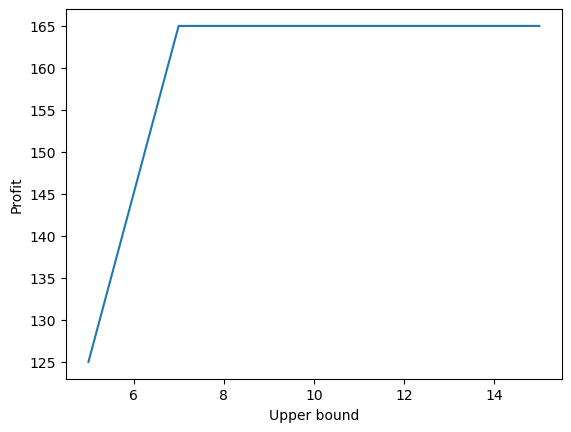

In [115]:
# Formulating the problem with the model, decision variables, objective function 
# and constraints. Includes the call to optimize the objective function.
# All data entered in the code. 
outcomes = []
ubs = [5,7,9,12,15]
for ub in ubs:
    model = gp.Model("myBIP") # Creating and naming the module
    1+1
    # Defining the decision variables and their lower and upper boundaries
    x_A = model.addVar(lb=0.0, ub=ub, vtype=GRB.INTEGER, name="x")
    x_B = model.addVar(lb=0.0, ub=ub, vtype=GRB.INTEGER, name="y")
    
    #Defining the objective function
    Profit = 10*x_A + 15*x_B
    model.setObjective(Profit, GRB.MAXIMIZE)
    
    #Defining the constraints and their limits
    Constraint_1 = 2*x_A + 4*x_B
    Constraint_2 = 2*x_A + x_B
    Bound_1 = 40
    Bound_2 = 20
    
    #Adding the constraints to the model
    # Labor Constraint
    Constr_1 = model.addConstr((Constraint_1<= Bound_1), name="Constraint1")
    
    # Raw Material Constraint
    Constr_2 = model.addConstr((Constraint_2<= Bound_2), name="Constraint2")
    
    # Non-Negativity Constraints
    # Th inclusion of lower bounds is redundant given that we already set lower bounds in the variable definition 
    model.addConstr((x_A >= 0), name="Constraint3")
    model.addConstr((x_B >= 0), name="Constraint4")
    
    #Calling for the optimization of the model
    model.optimize()
    
    # Printing out the Optimal solutiom
    
    # If the optimization process produces an optimal solution: 
    # Print the objective function value and the decision variable values at this optimal solution.
    if model.status == GRB.OPTIMAL:
          # Get the optimal value of the variables
          optimal_z = model.ObjVal
        
          print(f"Optimal solution found")
          print(f"x_A = {x_A.X}")
          print(f"x_B = {x_B.X}")
    
          print(f"Optimal value of z : {optimal_z}")
          outcomes.append(optimal_z)
          # Print constraint values at the optimal solution
          # At this optimal solution, print the constraint values (LHS) and the respective constraint’s limit (RHS). 
          #This will indicate if each constraint is active at the optimal solution.
          for constr in [Constr_1, Constr_2]:
            #constr_value = constr.Pi # Shadow price/dual value
            lhs_value = model.getRow(constr).getValue()  # LHS value
            rhs_value = constr.RHS  # RHS value
            print(f"{constr.ConstrName}: LHS = {lhs_value}, RHS = {rhs_value})")
    else:
        # Print this message if an optimal solution was not found
        print("Model was not solved to optimality.")
plt.plot(ubs,outcomes)
plt.xlabel("Upper bound")
plt.ylabel("Profit")

### 1-5 Activity: Scenario Analysis - Changing the constraint limits

What happens  when the constraint limits are changed?

Try the following changes to the constraint limits?

| | | |  |  |
| --- | --- | --- | --- | --- |
| **Contraint 1 Limit** | 20 | 50 | 80 | 100 |
| **Contraint 2 Limit** | 10 | 30 | 60 | 80 |

**ToDo:**

- Tweak the code below (which is a copy of the original code above) to change the constraint limits.
- What do you observe about the optimal results as these limits are changed?


#### Solution:

The learners just need to tweak the number in line 24-25 (Bound_1). 

Below is a more compact way to go through all changes in a for loop:

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x2438d66d
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [2e+01, 2e+01]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 100.0000000
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 100 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+02, best bound 1.000000000000e+02, gap 0.0000%
Optimal solution found
x_A = 10.0
x_B = -0.0


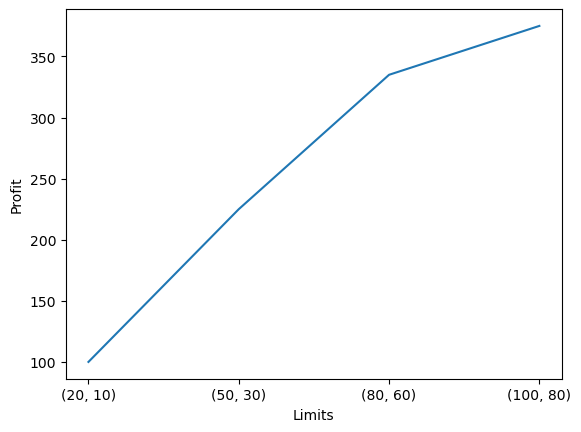

In [128]:
# Formulating the problem with the model, decision variables, objective function 
# and constraints. Includes the call to optimize the objective function.
# All data entered in the code. 

# Formulating the problem with the model, decision variables, objective function 
# and constraints. Includes the call to optimize the objective function.
# All data entered in the code. 
outcomes = []
limit_pairs = [(20,10),(50,30),(80,60),(100,80)]
for limits in limit_pairs:
    model = gp.Model("myBIP") # Creating and naming the module
    1+1
    # Defining the decision variables and their lower and upper boundaries
    x_A = model.addVar(lb=0.0, ub=15, vtype=GRB.INTEGER, name="x")
    x_B = model.addVar(lb=0.0, ub=15, vtype=GRB.INTEGER, name="y")
    
    #Defining the objective function
    Profit = 10*x_A + 15*x_B
    model.setObjective(Profit, GRB.MAXIMIZE)
    
    #Defining the constraints and their limits
    Constraint_1 = 2*x_A + 4*x_B
    Constraint_2 = 2*x_A + x_B
    Bound_1 = limits[0]
    Bound_2 = limits[0]
    
    #Adding the constraints to the model
    # Labor Constraint
    Constr_1 = model.addConstr((Constraint_1<= Bound_1), name="Constraint1")
    
    # Raw Material Constraint
    Constr_2 = model.addConstr((Constraint_2<= Bound_2), name="Constraint2")
    
    # Non-Negativity Constraints
    # Th inclusion of lower bounds is redundant given that we already set lower bounds in the variable definition 
    model.addConstr((x_A >= 0), name="Constraint3")
    model.addConstr((x_B >= 0), name="Constraint4")
    
    #Calling for the optimization of the model
    model.optimize()
    
    # Printing out the Optimal solutiom
    
    # If the optimization process produces an optimal solution: 
    # Print the objective function value and the decision variable values at this optimal solution.
    if model.status == GRB.OPTIMAL:
          # Get the optimal value of the variables
          optimal_z = model.ObjVal
        
          print(f"Optimal solution found")
          print(f"x_A = {x_A.X}")
          print(f"x_B = {x_B.X}")
    
          print(f"Optimal value of z : {optimal_z}")
          outcomes.append(optimal_z)
          # Print constraint values at the optimal solution
          # At this optimal solution, print the constraint values (LHS) and the respective constraint’s limit (RHS). 
          #This will indicate if each constraint is active at the optimal solution.
          for constr in [Constr_1, Constr_2]:
            #constr_value = constr.Pi # Shadow price/dual value
            lhs_value = model.getRow(constr).getValue()  # LHS value
            rhs_value = constr.RHS  # RHS value
            print(f"{constr.ConstrName}: LHS = {lhs_value}, RHS = {rhs_value})")
    else:
        # Print this message if an optimal solution was not found
        print("Model was not solved to optimality.")
plt.plot([str(p) for p in limit_pairs],outcomes)
plt.xlabel("Limits")
plt.ylabel("Profit")
model = gp.Model("myBIP") # Creating and naming the module


### (Optional) 1-6 Activity: Double sided constraints

How would you modify the code to handle double sides constraints, as seen below?

- $40 \leq 2x_A + 4x_B \leq 80$
- $30 \leq 2x_A + 1x_B \leq 60$

#### Solution:

In [139]:
# Formulating the problem with the model, decision variables, objective function 
# and constraints. Includes the call to optimize the objective function.
# All data entered in the code. 


model = gp.Model("myBIP") # Creating and naming the module

# Defining the decision variables and their lower and upper boundaries
x_A = model.addVar(lb=0.0, ub=15.0, vtype=GRB.INTEGER, name="x")
x_B = model.addVar(lb=0.0, ub=15.0, vtype=GRB.INTEGER, name="y")

#Defining the objective function
Profit = 10*x_A + 15*x_B
model.setObjective(Profit, GRB.MAXIMIZE)

#Defining the constraints and their limits
Constraint_1 = 2*x_A + 4*x_B
Constraint_2 = 2*x_A + x_B
Bound_1l = 40
Bound_1u = 80
Bound_2l = 30
Bound_2u = 60

#Adding the constraints to the model
# Labor Constraint
Constr_1l = model.addConstr((Constraint_1 >= Bound_1l), name="Constraint1l")
Constr_1u = model.addConstr((Constraint_1 <= Bound_1u), name="Constraint1u")


# Raw Material Constraint
Constr_2l = model.addConstr((Constraint_2 >= Bound_2l), name="Constraint2l")
Constr_2u = model.addConstr((Constraint_2 <= Bound_2u), name="Constraint2u")


# Non-Negativity Constraints
# Th inclusion of lower bounds is redundant given that we already set lower bounds in the variable definition 
model.addConstr((x_A >= 0), name="Constraint3")
model.addConstr((x_B >= 0), name="Constraint4")

#Calling for the optimization of the model
model.optimize()

# Printing out the Optimal solutiom

# If the optimization process produces an optimal solution: 
# Print the objective function value and the decision variable values at this optimal solution.
if model.status == GRB.OPTIMAL:
      # Get the optimal value of the variables
      optimal_z = model.ObjVal
    
      print(f"Optimal solution found")
      print(f"x_A = {x_A.X}")
      print(f"x_B = {x_B.X}")

      print(f"Optimal value of z : {optimal_z}")

      # Print constraint values at the optimal solution
      # At this optimal solution, print the constraint values (LHS) and the respective constraint’s limit (RHS). 
      #This will indicate if each constraint is active at the optimal solution.
      for constr in [Constr_1l, Constr_1u, Constr_2l, Constr_2u]:
        #constr_value = constr.Pi # Shadow price/dual value
        lhs_value = model.getRow(constr).getValue()  # LHS value
        rhs_value = constr.RHS  # RHS value
        print(f"{constr.ConstrName}: LHS = {lhs_value}, RHS = {rhs_value})")
else:
    # Print this message if an optimal solution was not found
    print("Model was not solved to optimality.")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 6 rows, 2 columns and 10 nonzeros
Model fingerprint: 0x2bb3c99b
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [2e+01, 2e+01]
  RHS range        [3e+01, 8e+01]
Presolve removed 6 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 335 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.350000000000e+02, best bound 3.350000000000e+02, gap 0.0000%
Optimal solution found
x_A = 14.0
x_B = 13.0
Optimal value of z : 335.0
Constraint1l: LHS = 